# Import

In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [10]:
def plot_column(ax, column, df):
    if df[column].dtype == 'object':
        # Check if binary
        if df[column].nunique() == 2:
            # Binary data visualization
            df[column].value_counts().plot(kind='bar', ax=ax)
        else:
            # Categorical data visualization
            df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax)
    elif df[column].dtype == 'int64' or df[column].dtype == 'float64':
        # Numeric data visualization
        df[column].plot(kind='hist', bins=20, ax=ax)
    else:
        ax.text(0.5, 0.5, f"Unhandled data type for column: {column}", 
                fontsize=12, ha='center')
    ax.set_title(column)


In [11]:
def plot_column_data(df, column_name):
    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in DataFrame.")
        return
    
    # Get the data type of the column
    data_type = df[column_name].dtype
    
    # Plot the data based on the data type
    if data_type == 'int64' or data_type == 'float64':
        # Plot numerical data
        plt.figure(figsize=(8, 6))
        plt.hist(df[column_name], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    elif data_type == 'object':
        # Plot categorical data
        value_counts = df[column_name].value_counts()
        plt.figure(figsize=(8, 6))
        value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Bar plot of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    else:
        print(f"Data type '{data_type}' not supported for plotting.")

In [12]:
def read_files_in_directory(directory):

    file_paths = []
    for root, _, files in os.walk(directory):

        for file in files:
            if file[-3:] != "txt":
                file_path = os.path.join(root, file)
                file_paths.append(file_path)
    return file_paths
directory_path = "data/geneReadTest/"
files = read_files_in_directory(directory_path)

In [13]:
HS = ["ALDOA", "ANGPTL4" , "ANLN" , "BNC1" , 'C20orf20' , 'CA9' , 
      'CDKN3' , 'COL4A6' , 'DCBLD1' , 'ENO1' , 'FAM83B', 'FOSL1' , 
      'GNAI1' , 'HIG2' , 'KCTD11' , 'KRT17' , 'LDHA' , 'MPRS17' , 
      "P4HA1" 	, 'PGAM1' 	, 'PGK1' 	, 'SDC1' 	, 'SLC16A1' , 
      'SLC2A1', 'TPI1' 	, 'VEGFA']

IS = ["HLA-DQA1", "HLA-DQA2", "HLA-DRB5", "CTLA4", "PDCD1LG2", 
      'ICAM1', 'CD274', 'STAT1', 'IRF1', 'IFNG', 'GNLY', "TBX21", 
      "CCL5", "LAG3", "CD247", 'ICOS', 'IL18RAP', "CXCL9", "CXCL10", 
      "HLA-DPB1", 'HLA-DPA1', "HLA-DMB", 'HLA-DRA', 'HLA-DMA', 'CD80', 
      "HLA-DOA", "CD4"]
hypooxia_immue_signature = HS + IS

In [14]:
def extract_hypooxia_immue_signature(file):
    df = pd.read_csv(file, sep='\t',skiprows=1)
    filtered_df = df[df['gene_name'].isin(hypooxia_immue_signature)]
    gene_in_data = set(df['gene_name'])
    not_detected = set(hypooxia_immue_signature) - gene_in_data
    return filtered_df, not_detected

In [15]:
for file in files:
    df, not_detected = extract_hypooxia_immue_signature(file)
    print(not_detected)

{'MPRS17', 'HIG2', 'C20orf20'}
{'MPRS17', 'HIG2', 'C20orf20'}
{'MPRS17', 'HIG2', 'C20orf20'}
{'MPRS17', 'HIG2', 'C20orf20'}


{'MPRS17', 'HIG2', 'C20orf20'}
{'MPRS17', 'HIG2', 'C20orf20'}
{'MPRS17', 'HIG2', 'C20orf20'}
{'MPRS17', 'HIG2', 'C20orf20'}
{'MPRS17', 'HIG2', 'C20orf20'}


# Gene
| case_ID | gene_1 | gene_2 | .... | 
##### Case Id to be matched


In [16]:
def extract_tpm(file):
    df = pd.read_csv(file, sep='\t',skiprows=1)
    subset_df = df.iloc[4:, df.columns.isin(['tpm_unstranded', 'gene_id', 'gene_name'])]
    subset_df['header'] = subset_df['gene_id'] + '_' + subset_df['gene_name'] # Same genes, different id. multiple record
    transposed_df = subset_df[['header', 'tpm_unstranded']].T
    transposed_df.columns = transposed_df.loc['header']
    transposed_df = transposed_df.drop('header').reset_index(drop=True).sort_index(axis=1)
    return transposed_df

In [17]:
def merge_cases(files,extractor):
    merged = extractor(files[0])
    for file in files[1:]:
        to_be_merge = extractor(file)
        merged = pd.concat([to_be_merge, merged], axis=0, ignore_index=True)
    return merged
    

In [18]:
merge_gene_read = merge_cases(files,extract_tpm)


# Protein
| case_ID | protein_1 | protein_2 | .... |

In [19]:
# directory_path = "../data/Protein_Expression"
# files = read_files_in_directory(directory_path)

In [20]:
def get_case_id_from_filename(file):
    index = file.find("TCGA")
    return file[index:index+12]

In [21]:
def extract_protein_expression(file):
    df = pd.read_csv(file, sep='\t')
    subset_df = df[['protein_expression', 'AGID']]
    transposed_df = subset_df.set_index('AGID').T
    transposed_df = transposed_df.reset_index(drop=True)
    transposed_df.insert(0, 'case_submitter_id', [get_case_id_from_filename(file)])
    return transposed_df

In [22]:
merged_protein_expression = pd.read_csv('merged_protein_expression.csv')
merged_protein_expression.shape

(353, 488)

In [23]:
# merged_protein_expression = merge_cases(files,extract_protein_expression).sort_values(by='case_submitter_id')
# merged_protein_expression.to_csv('merged_protein_expression.csv',index=False)

In [24]:
def calculate_column_statistics(df):
    results = pd.DataFrame(index=df.columns, columns=['Mean', 'Variance', 'NumUniqueValues', 'NumNaNs'])
    for column in df.columns:
        if column not in ["case_submitter_id"]:
            results.at[column, 'Mean'] = df[column].mean()
            results.at[column, 'Variance'] = df[column].var()
            results.at[column, 'NumUniqueValues'] = df[column].nunique()
            results.at[column, 'NumNaNs'] = df[column].isna().sum()
    return results

In [25]:
pd.set_option('display.max_rows', 500)

In [26]:
statistics= calculate_column_statistics(merged_protein_expression)


In [27]:
def extract_rows_by_nan(df, nan_threshold=353):
    columns = [column for column in df.columns if df[column].isna().sum() == nan_threshold]
    return columns

In [28]:
statistics= calculate_column_statistics(merged_protein_expression)
statistics["NumNaNs"].unique()

array([nan, 0, 10, 353, 141, 280], dtype=object)

353 means the protein is missing in all cases, drop

In [29]:
empmpty_columns = extract_rows_by_nan(merged_protein_expression,353)
merged_protein_expression = merged_protein_expression.drop(columns=empmpty_columns)
merged_protein_expression.shape

(353, 470)

488-470 = 18: 18 protein is removed since they are empty

In [30]:
full_columns = extract_rows_by_nan(merged_protein_expression,0)
merged_protein_expression[full_columns].shape

(353, 218)

218/488 protein recorded in all 353 cases

In [31]:
def extract_rows_with_nan(df, columns):
    return df[df[columns].isnull().any(axis=1)]

In [32]:
columns_missing_10 = extract_rows_by_nan(merged_protein_expression,10)
merged_protein_expression[columns_missing_10].isna().any(axis=1).sum()

10

In [33]:
missing_rows=extract_rows_with_nan(merged_protein_expression,columns_missing_10)[["case_submitter_id"]+columns_missing_10]

Above 10 cases contains 240 missing values, too much missing and only 10, drop?

In [34]:
merged_protein_expression = merged_protein_expression.drop(missing_rows.index)
merged_protein_expression.shape

(343, 470)

In [35]:
calculate_column_statistics(merged_protein_expression)["NumNaNs"].unique()

array([nan, 0, 141, 270], dtype=object)

1 columns missing in 280 cases now 270

In [36]:
columns = extract_rows_by_nan(merged_protein_expression,270)
column = merged_protein_expression[columns]
calculate_column_statistics(column)

,Mean,Variance,NumUniqueValues,NumNaNs
AGID00332,0.753015,1.012533,73,270


In [37]:
merged_protein_expression = merged_protein_expression.drop(["AGID00332"],axis=1)
merged_protein_expression.shape


(343, 469)

In [38]:
calculate_column_statistics(merged_protein_expression)["NumNaNs"].unique()

array([nan, 0, 141], dtype=object)

In [39]:
columns = extract_rows_by_nan(merged_protein_expression,141)
merged_protein_expression[columns].shape


(343, 12)

12 columns 141 missing values, imputation?
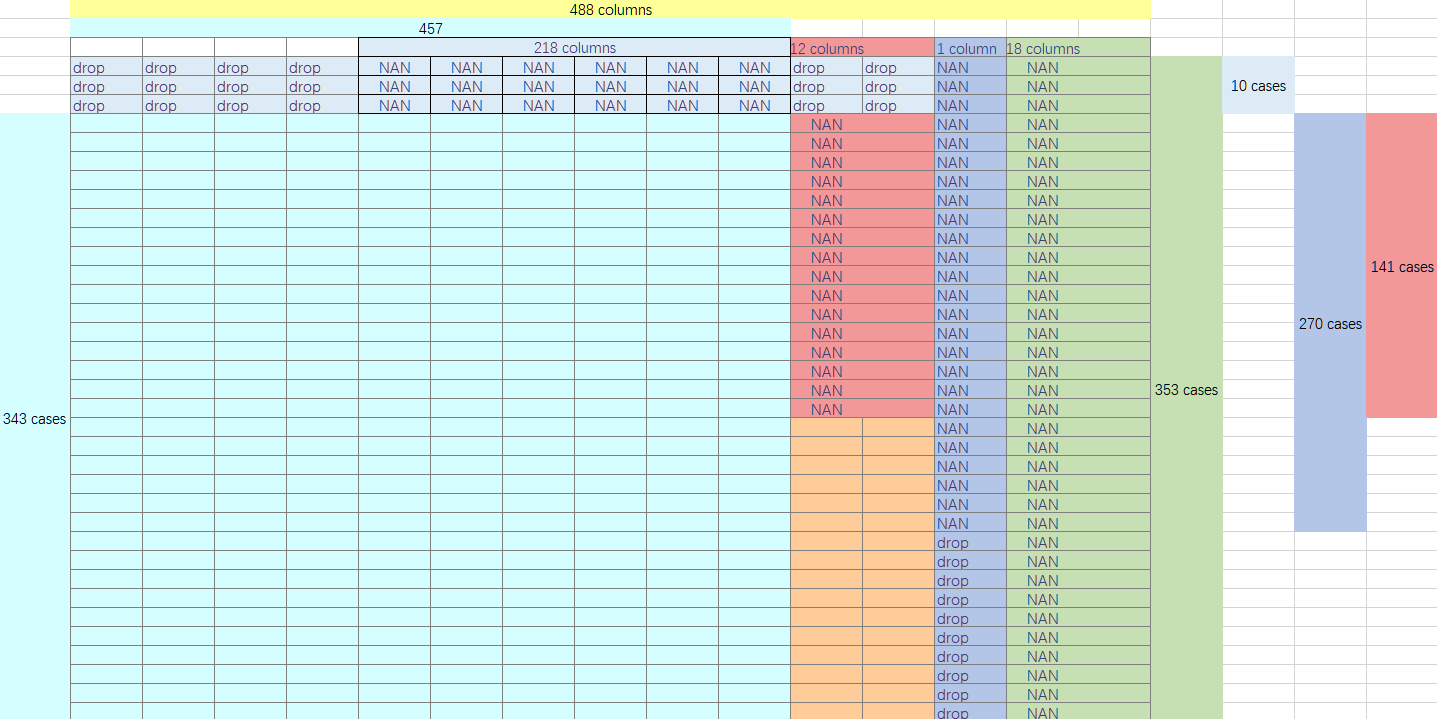

In [40]:
# medians = merged_protein_expression[columns].median()

# merged_protein_expression[columns] = merged_protein_expression[columns].fillna(medians)
# protein_expression_no_inputation = merged_protein_expression.drop(columns=columns, axis=1)
# print(merged_protein_expression.shape,protein_expression_no_inputation.shape)


In [41]:
path = "D:\\UCL\\Week14\\HSAE\\data\\clinical\\clinical.tsv"
df = pd.read_csv(path,sep='\t')

In [42]:
df['days_to_death'] = pd.to_numeric(df['days_to_death'], errors='coerce')

In [43]:
# df['days_to_last_follow_up'] = pd.to_numeric(df['days_to_last_follow_up'], errors='coerce')
# df['days_to_death'] = pd.to_numeric(df['days_to_death'], errors='coerce')
# df['days_to_diagnosis'] = pd.to_numeric(df['days_to_diagnosis'], errors='coerce')
# deceased_patients = df[df['vital_status'] == 'Dead']


In [44]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 30))
# fig.tight_layout(pad=5.0)


# for i, col in enumerate(merged_protein_expression):

#     plot_column(axes[i//4, i%4], col,df[["days_to_death"]])


# plt.show()

In [45]:
colums = ["case_submitter_id","age_at_index", "days_to_birth", "days_to_death", "ethnicity", "gender", "race", "vital_status", "age_at_diagnosis", "days_to_last_follow_up","year_of_diagnosis", "treatment_or_therapy","ajcc_pathologic_stage"]
deduplicate = df[df.index %2 !=0].sort_values(by='case_submitter_id')

In [46]:
merged_df_no_inputation = pd.merge(merged_protein_expression, deduplicate[["ajcc_pathologic_stage","days_to_death","case_submitter_id"]], on='case_submitter_id', how='inner')
merged_df_no_inputation["ajcc_pathologic_stage"].unique()

array(['Stage IVA', "'--", 'Stage II', 'Stage III', 'Stage I',
       'Stage IVB'], dtype=object)

In [47]:
def encode_stage_column(df, column_name):
    # Define mapping dictionary
    stage_mapping = {
        "Stage I": 0,
        "Stage II": 1,
        "Stage III": 2,
        "Stage IVA": 3,
        "Stage IVB": 4,
        "'--": -1
            }
    
    # Apply mapping to the column
    df[column_name] = df[column_name].map(stage_mapping)
    
    return df

In [48]:
merged_df_no_inputation = encode_stage_column(merged_df_no_inputation,"ajcc_pathologic_stage")

If ajcc_pathologic_stage is none plus the columns are null, no information on what median to map to, drop
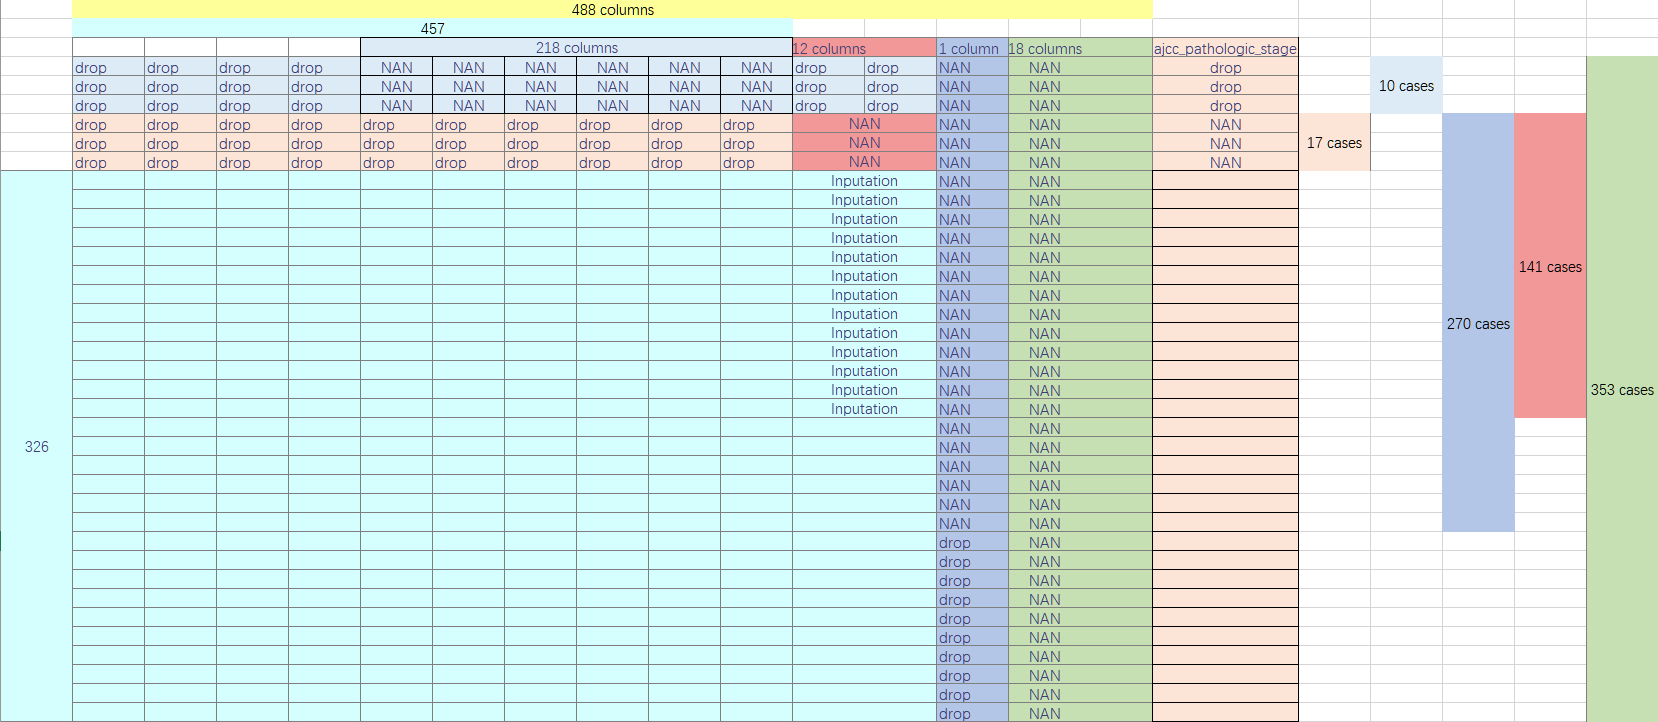

In [49]:
merged_df_no_inputation.shape

(343, 471)

In [50]:
def drop_rows(df, columns_to_check):
    all_nan = df[columns_to_check].isnull().all(axis=1)
    stage_minus_one = df["ajcc_pathologic_stage"] == -1
    to_drop = all_nan & stage_minus_one
    df = df[~to_drop]
    return df
merged_df_no_inputation = drop_rows(merged_df_no_inputation,columns)

In [51]:
merged_df_no_inputation.shape

(326, 471)

In [52]:
def impute_missing_with_group_median(merged_df_no_inputation, reference_column, columns_to_impute):

    for col in columns_to_impute:

        median_values = merged_df_no_inputation.groupby(reference_column)[col].median()

        for index, row in merged_df_no_inputation[merged_df_no_inputation[col].isnull()].iterrows():

            
            label_value = row[reference_column]

            merged_df_no_inputation.at[index, col] = median_values[label_value]
    return merged_df_no_inputation

In [53]:
merged_df = impute_missing_with_group_median(merged_df_no_inputation,"ajcc_pathologic_stage",columns)

In [54]:
def contain_nan(df,col):
    if df[col].isna().any():
        return True
    return False

In [55]:
for col in columns:
    print(contain_nan(merged_df,col))

False
False
False
False
False
False
False
False
False
False
False
False


# Load data


In [56]:
# merged_df.to_csv('protein_expression.csv',index=False)


In [58]:
merged_df = pd.read_csv('protein_expression.csv')
columns = ['AGID00215',
 'AGID00537',
 'AGID00536',
 'AGID00211',
 'AGID00485',
 'AGID00383',
 'AGID00216',
 'AGID00257',
 'AGID00545',
 'AGID00413',
 'AGID00547',
 'AGID00144']

AE

In [5]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC

In [59]:
merged_df = merged_df.drop('case_submitter_id', axis=1)
merged_df = merged_df.drop('ajcc_pathologic_stage', axis=1)
other = merged_df.columns.drop("days_to_death")
X_train, X_test, y_train, y_test = train_test_split(merged_df[other], merged_df["days_to_death"],
                                                    train_size=0.75,
                                                    random_state=1)

In [60]:
merged_df_no_inputation = merged_df.drop(columns, axis=1)
other = merged_df_no_inputation.columns.drop("days_to_death")
X_train_no_inputation, X_test_no_inputation, y_train_no_inputation, y_test_no_inputation = train_test_split(merged_df_no_inputation[other], merged_df_no_inputation["days_to_death"],
                                                    train_size=0.75,
                                                    random_state=1)

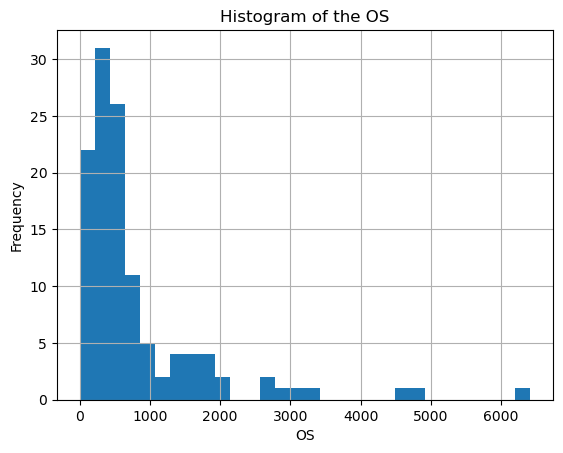

In [ ]:
y_train.hist(bins=30) 
plt.xlabel('OS')
plt.ylabel('Frequency')
plt.title('Histogram of the OS')
plt.show()

survice timespan: 
1. 0-1
2. 1-3
3. 3-5
4. 5-10
5. 10-20
6. >20 /alive

## AE class

In [81]:
class AE():
    def __init__(self,X_train,X_test,y_train,y_test,bottleneck,type):
        self.X_train = X_train
        self.X_test = X_test        
        self.y_train = y_train
        self.y_test = y_test
        self.bottleneck = bottleneck
        self.history = None
        self.encoder = None
        self.autoencoder = None
        self.type = type

    def train(self):
    # Number of features in your dataset
        n_features = len(self.X_train.columns) 


        input_layer = Input(shape=(n_features,))
        encoder = Dense(64, activation='relu')(input_layer)
        encoder = Dense(32, activation='relu')(encoder)


        bottleneck = Dense(self.bottleneck, activation='relu')(encoder)  

        # Define the decoder (mirror the encoder)
        decoder = Dense(32, activation='relu')(bottleneck)
        decoder = Dense(64, activation='relu')(decoder)
        self.encoder= Model(inputs=input_layer, outputs=bottleneck)

        # Output layer
        output_layer = Dense(n_features, activation='sigmoid')(decoder) 

        # Define the autoencoder model
        self.autoencoder = Model(inputs=input_layer, outputs=output_layer)

        # Compile the autoencoder
        self.autoencoder.compile(optimizer='adam', loss='mse')

        self.history = self.autoencoder.fit(self.X_train, self.X_train,  # The target is the input data itself
                epochs=100,
                batch_size=16,
                shuffle=True,
                validation_data=(self.X_test, self.X_test))
        
        self.encode()
        self.map_y()

    def plot(self):
        plt.plot(self.history.history['loss'], label='Training Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss '+ self.type)
        plt.legend()
        plt.show()

    def encode(self):
        self.encoded_X_train = self.encoder.predict(self.X_train)
        self.encoded_X_test = self.encoder.predict(self.X_test)
    
    def do_PCA(self,n_components):
        if n_components ==2:
            pca = PCA(n_components=n_components)
            reduced_data = pca.fit_transform(self.encoded_X_train)
            x = reduced_data[:, 0]
            y = reduced_data[:, 1]
            plt.figure(figsize=(8, 6))
            scatter = plt.scatter(x, y, c=self.y_trian_in_bin, cmap='viridis', alpha=0.7)
            plt.title('PCA of Encoded Data '+self.type)
            plt.xlabel('Principal Component 1')
            plt.ylabel('Principal Component 2')
            plt.colorbar(scatter, label='OS')
            plt.grid(True)
            plt.show()
        elif n_components ==3:
            pca = PCA(n_components=3)  # Reduce to 3 dimensions
            reduced_data = pca.fit_transform(self.encoded_X_train)
            x = reduced_data[:, 0]
            y = reduced_data[:, 1]
            z = reduced_data[:, 2]
            fig =plt.figure(figsize=(8, 6))
            ax = fig.add_subplot(111, projection='3d')
            scatter = ax.scatter(x, y, z, c=self.y_trian_in_bin, cmap='viridis', depthshade=True)
            ax.set_title('3D PCA of Encoded Data '+self.type)
            ax.set_xlabel('Principal Component 1')
            ax.set_ylabel('Principal Component 2')
            ax.set_zlabel('Principal Component 3')
            plt.colorbar(scatter, label='OS')
            plt.show()

    @staticmethod
    def map_years_to_group(value):
        years = value / 365
        if years <= 1:
            return 0
        elif 1 < years <= 3:
            return 1
        elif 3 < years <= 5:
            return 2
        elif 5 < years <= 10:
            return 3
        elif 10 < years <= 20:
            return 4
        else:  
            return 5
        
    @staticmethod        
    def map_to_binary(category):
        if category >= 4:
            return 1
        else:  
            return 0
        
    def map_y(self):
        self.y_trian_in_category = self.y_train.map(AE.map_years_to_group)
        self.y_test_in_category = self.y_test.map(AE.map_years_to_group)        
        
        self.y_trian_in_bin = self.y_trian_in_category.map(AE.map_to_binary)
        self.y_test_in_bin = self.y_test_in_category.map(AE.map_to_binary)

    def do_RF(self,binary):
        clf = RandomForestClassifier(n_estimators=100, random_state=0)

        if binary:
            clf.fit(self.encoded_X_train, self.y_trian_in_bin)
            y_pred = clf.predict(self.encoded_X_test)
            cm = confusion_matrix(self.y_test_in_bin, y_pred)
            print(classification_report(self.y_test_in_bin, y_pred))

        else:
            clf.fit(self.encoded_X_train, self.y_trian_in_category)
            y_pred = clf.predict(self.encoded_X_test)
            cm = confusion_matrix(self.y_test_in_category, y_pred)
            print(classification_report(self.y_test_in_category, y_pred))

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_pred), yticklabels=np.unique(self.y_test_in_bin))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('RF Confusion Matrix '+self.type)
        plt.show()

    def do_Kmean(self):
        # Number of clusters - assuming you want as many as your known classes
        num_clusters = 2
        # Perform K-means clustering on the PCA output
        kmeans = KMeans(n_clusters=num_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(self.encoded_X_train)  # Use your 2D or 3D PCA-reduced data here


        print("Classification Report:")
        print(classification_report(self.y_trian_in_bin, cluster_labels))
        conf_mat = confusion_matrix(self.y_trian_in_bin, cluster_labels)

        # Plotting the confusion matrix
        sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_clusters), yticklabels=np.unique(self.y_trian_in_bin))
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('K-mean Confusion Matrix '+self.type)
        plt.show()

    def do_SVM(self,binary):
        svm_classifier = SVC(kernel='rbf', random_state=42)

        if binary:
            svm_classifier.fit(self.encoded_X_train, self.y_trian_in_bin)
            y_pred = svm_classifier.predict(self.encoded_X_test)
            cm = confusion_matrix(self.y_test_in_bin, y_pred)
            print(classification_report(self.y_test_in_bin, y_pred))
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_pred), yticklabels=np.unique(self.y_test_in_bin))
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('SVM Confusion Matrix '+ self.type)
            plt.show()
        else:
            svm_classifier.fit(self.encoded_X_train, self.y_trian_in_category)
            y_pred = svm_classifier.predict(self.encoded_X_test)
            cm = confusion_matrix(self.y_test_in_category, y_pred)
            print(classification_report(self.y_test_in_category, y_pred))
        
            # Plotting the confusion matrix
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_pred), yticklabels=np.unique(self.y_test_in_category))
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('SVM Confusion Matrix '+ self.type)
            plt.show()


        


Epoch 1/100
16/16 [==============================] - 1s 22ms/step - loss: 0.6005 - val_loss: 0.4990
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3881 - val_loss: 0.3612
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3417 - val_loss: 0.3582
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3390 - val_loss: 0.3562
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3364 - val_loss: 0.3535
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3336 - val_loss: 0.3501
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3301 - val_loss: 0.3470
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3258 - val_loss: 0.3426
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3223 - val_loss: 0.3396
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3200 - val_loss: 0.3378
Epoch 11

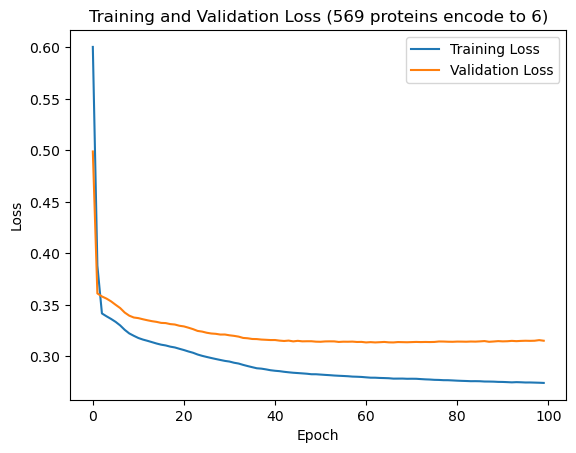

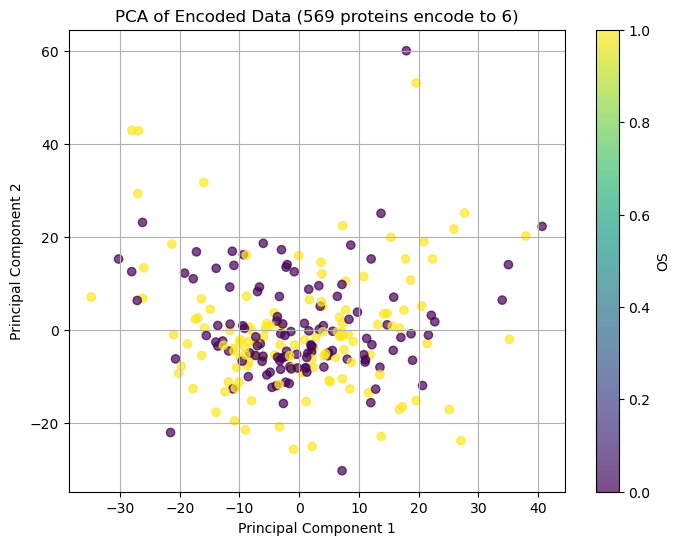

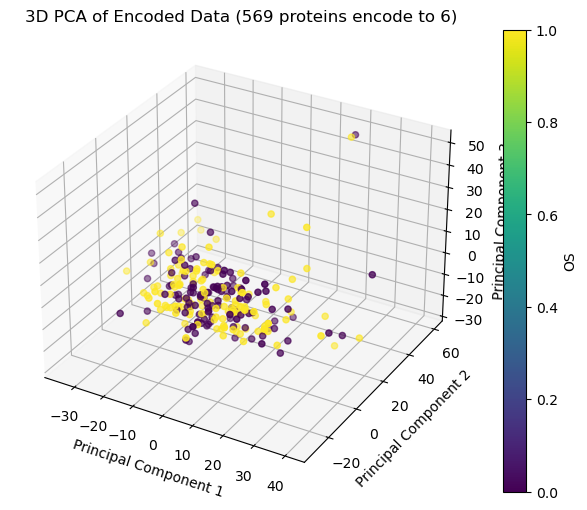

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.67      0.59       116
           1       0.60      0.45      0.51       128

    accuracy                           0.55       244
   macro avg       0.56      0.56      0.55       244
weighted avg       0.56      0.55      0.55       244



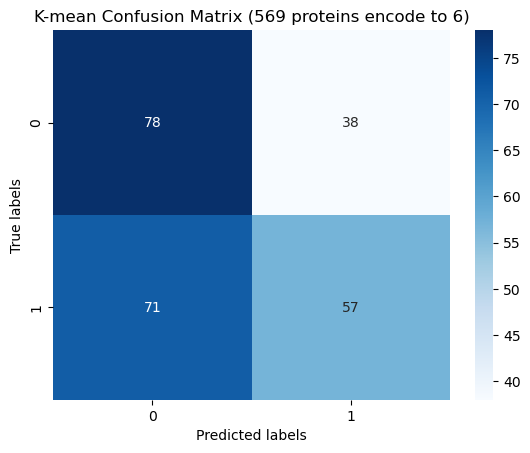

              precision    recall  f1-score   support

           0       0.60      0.45      0.51        40
           1       0.58      0.71      0.64        42

    accuracy                           0.59        82
   macro avg       0.59      0.58      0.58        82
weighted avg       0.59      0.59      0.58        82



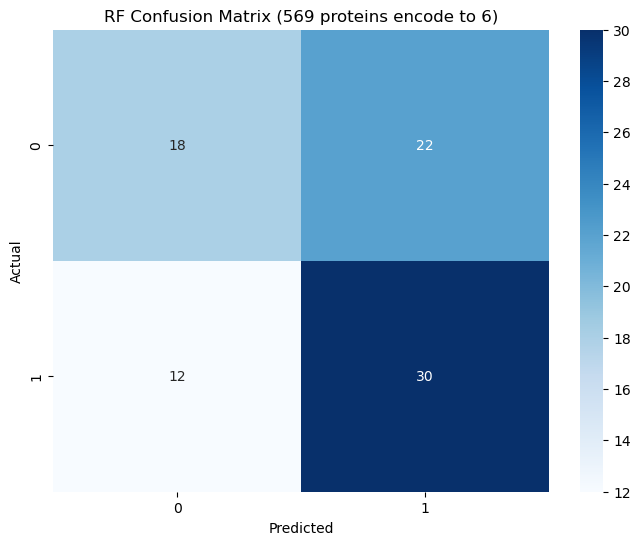

              precision    recall  f1-score   support

           0       0.47      0.23      0.31        40
           1       0.51      0.76      0.61        42

    accuracy                           0.50        82
   macro avg       0.49      0.49      0.46        82
weighted avg       0.49      0.50      0.46        82



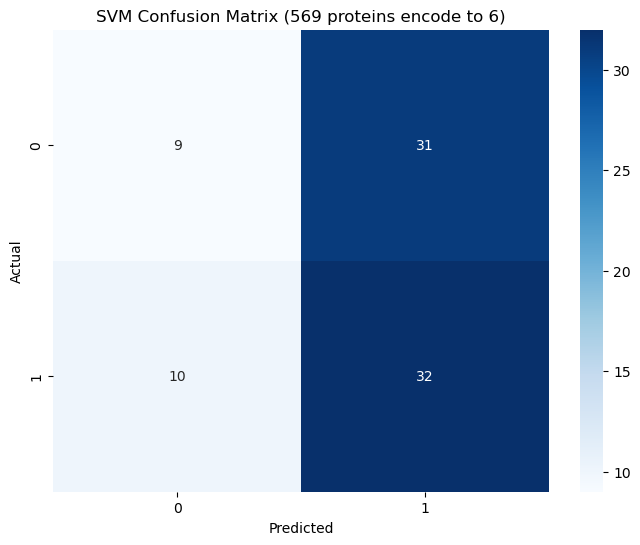

In [82]:
AE_inputation = AE(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,bottleneck = 6,type = "(569 proteins encode to 6)")
AE_inputation.train()
AE_inputation.plot()
AE_inputation.do_PCA(2)
AE_inputation.do_PCA(3)
AE_inputation.do_Kmean()
AE_inputation.do_RF(binary=True)
AE_inputation.do_SVM(binary=True)



Not Ideal, switch to binary classification
1. AE to 6
2. AE to 2 dim

Epoch 1/100
16/16 [==============================] - 1s 18ms/step - loss: 0.6191 - val_loss: 0.5588
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4240 - val_loss: 0.3697
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3446 - val_loss: 0.3605
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3403 - val_loss: 0.3581
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3388 - val_loss: 0.3551
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3363 - val_loss: 0.3537
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3336 - val_loss: 0.3494
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3300 - val_loss: 0.3473
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3276 - val_loss: 0.3458
Epoch 10/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3262 - val_loss: 0.3446
Epoch 11

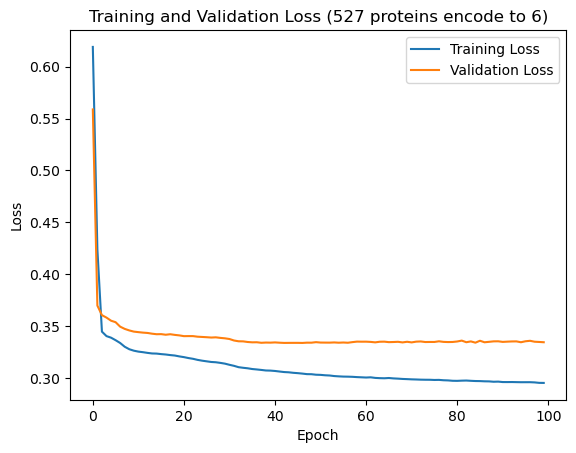

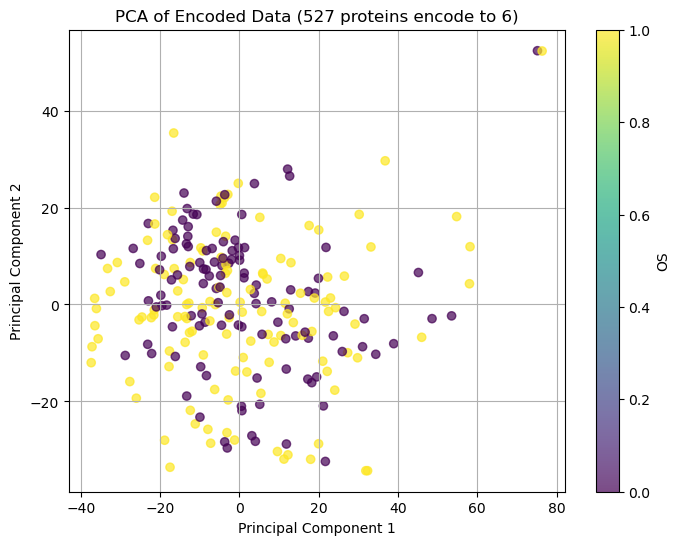

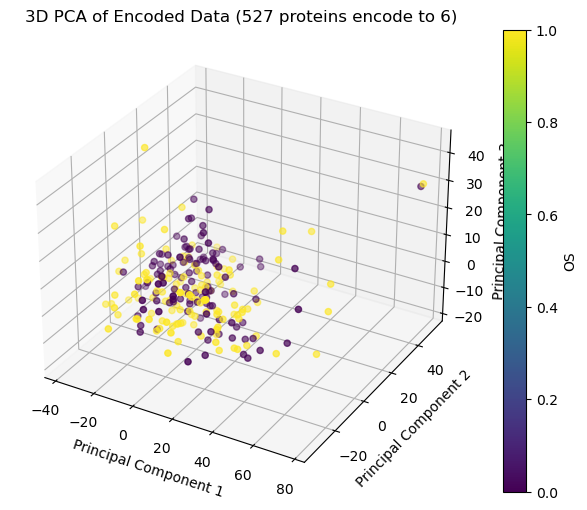

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.68      0.57       116
           1       0.55      0.35      0.43       128

    accuracy                           0.51       244
   macro avg       0.52      0.52      0.50       244
weighted avg       0.52      0.51      0.50       244



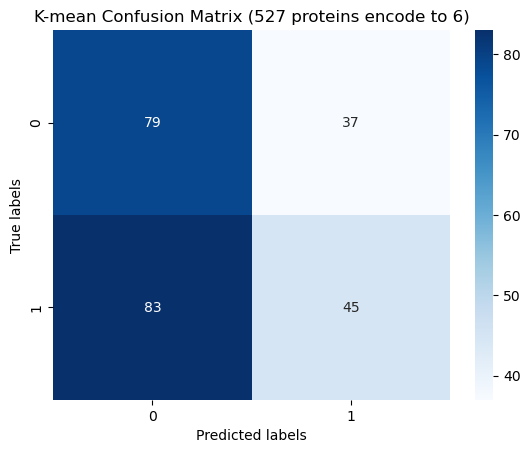

              precision    recall  f1-score   support

           0       0.59      0.47      0.53        40
           1       0.58      0.69      0.63        42

    accuracy                           0.59        82
   macro avg       0.59      0.58      0.58        82
weighted avg       0.59      0.59      0.58        82



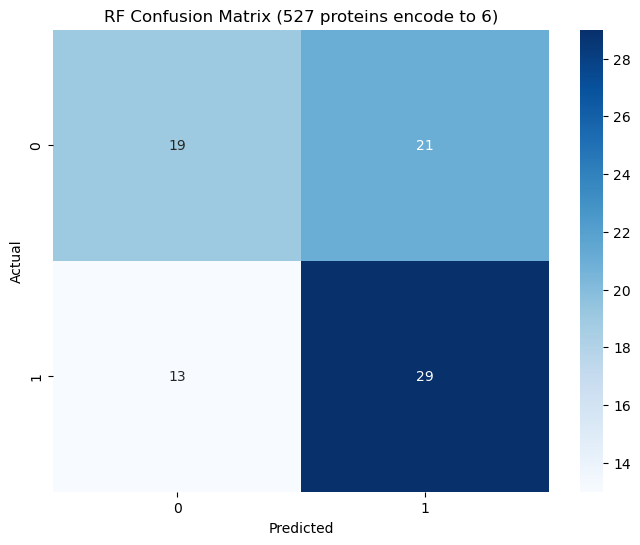

              precision    recall  f1-score   support

           0       0.52      0.35      0.42        40
           1       0.53      0.69      0.60        42

    accuracy                           0.52        82
   macro avg       0.52      0.52      0.51        82
weighted avg       0.52      0.52      0.51        82



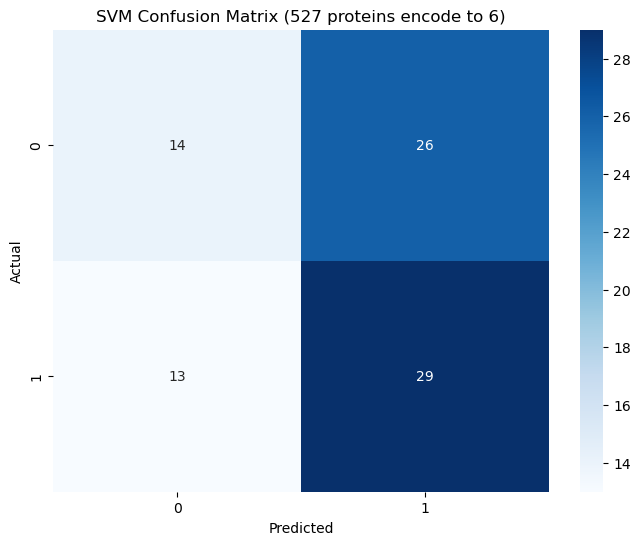

In [83]:
AE_no_inputation = AE(X_train=X_train_no_inputation,X_test=X_test_no_inputation,y_train=y_train_no_inputation,y_test=y_test_no_inputation,bottleneck = 6,type = "(527 proteins encode to 6)")
AE_no_inputation.train()
AE_no_inputation.plot()
AE_no_inputation.do_PCA(2)
AE_no_inputation.do_PCA(3)
AE_no_inputation.do_Kmean()
AE_no_inputation.do_RF(binary=True)
AE_no_inputation.do_SVM(binary=True)



Epoch 1/100
16/16 [==============================] - 1s 16ms/step - loss: 0.6312 - val_loss: 0.6089
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4593 - val_loss: 0.3726
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3432 - val_loss: 0.3567
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3353 - val_loss: 0.3515
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3312 - val_loss: 0.3477
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3286 - val_loss: 0.3468
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3271 - val_loss: 0.3453
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3250 - val_loss: 0.3437
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3240 - val_loss: 0.3428
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3233 - val_loss: 0.3421
Epoch 11

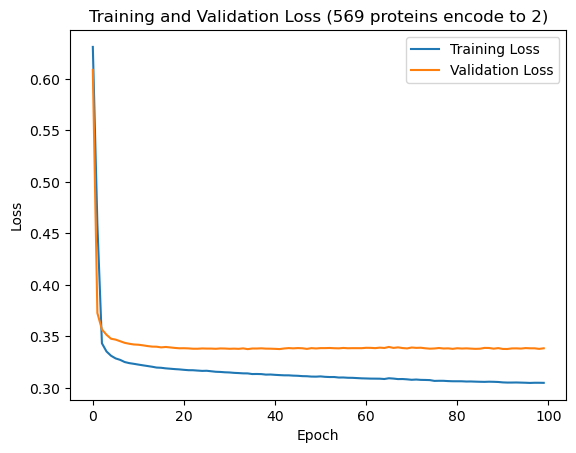

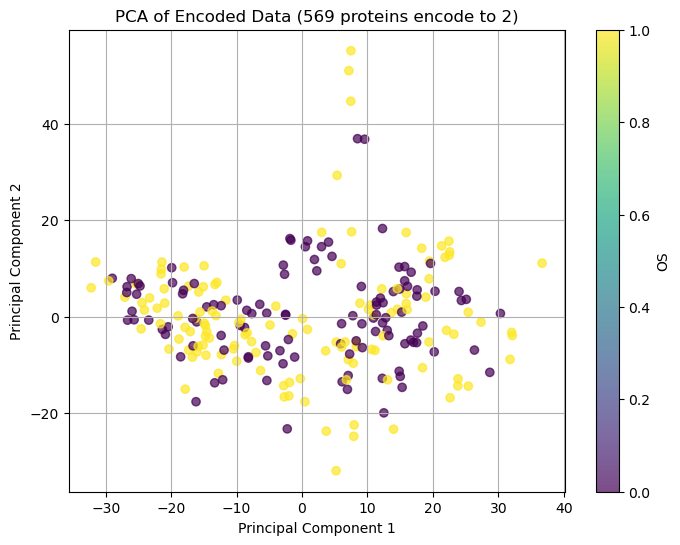

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.45      0.44       116
           1       0.49      0.48      0.49       128

    accuracy                           0.47       244
   macro avg       0.47      0.47      0.47       244
weighted avg       0.47      0.47      0.47       244



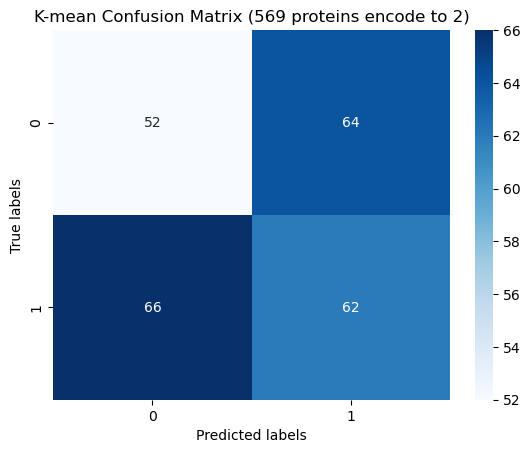

              precision    recall  f1-score   support

           0       0.49      0.50      0.49        40
           1       0.51      0.50      0.51        42

    accuracy                           0.50        82
   macro avg       0.50      0.50      0.50        82
weighted avg       0.50      0.50      0.50        82



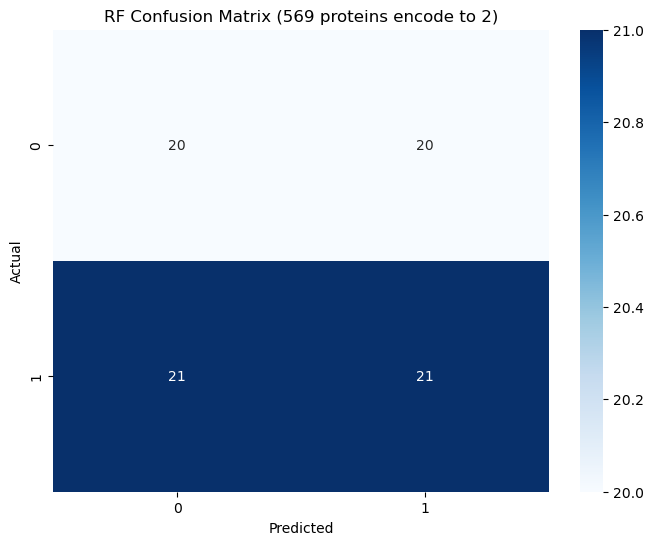

              precision    recall  f1-score   support

           0       0.48      0.38      0.42        40
           1       0.51      0.62      0.56        42

    accuracy                           0.50        82
   macro avg       0.50      0.50      0.49        82
weighted avg       0.50      0.50      0.49        82



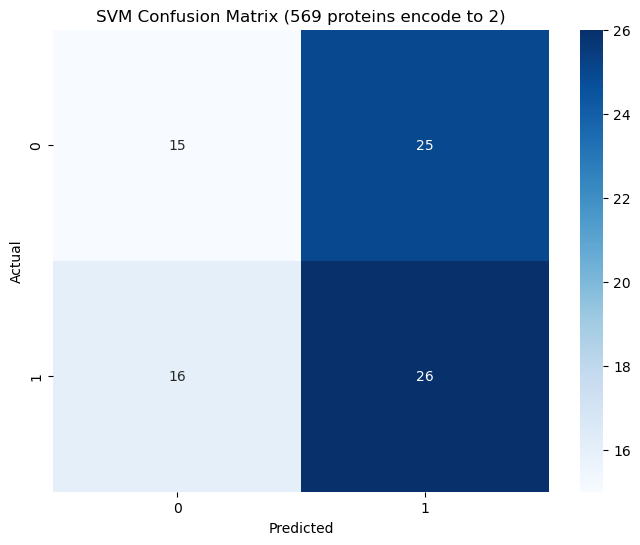

In [80]:
AE_inputation_2d = AE(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,bottleneck = 2,type = "(569 proteins encode to 2)")
AE_inputation_2d.train()
AE_inputation_2d.plot()
AE_inputation_2d.do_PCA(2)
AE_inputation_2d.do_Kmean()
AE_inputation_2d.do_RF(binary=True)
AE_inputation_2d.do_SVM(binary=True)



In [ ]:
AE_no_inputation_2d = AE(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,bottleneck = 2,type = "(569 proteins encode to 2)")
AE_no_inputation_2d.train()
AE_no_inputation_2d.plot()
AE_no_inputation_2d.do_PCA(2)
AE_no_inputation_2d.do_Kmean()
AE_no_inputation_2d.do_RF(binary=True)
AE_no_inputation_2d.do_SVM(binary=True)



# Kaplan-Meier curve and log rank test

In [74]:
pd.set_option('display.max_columns', None)

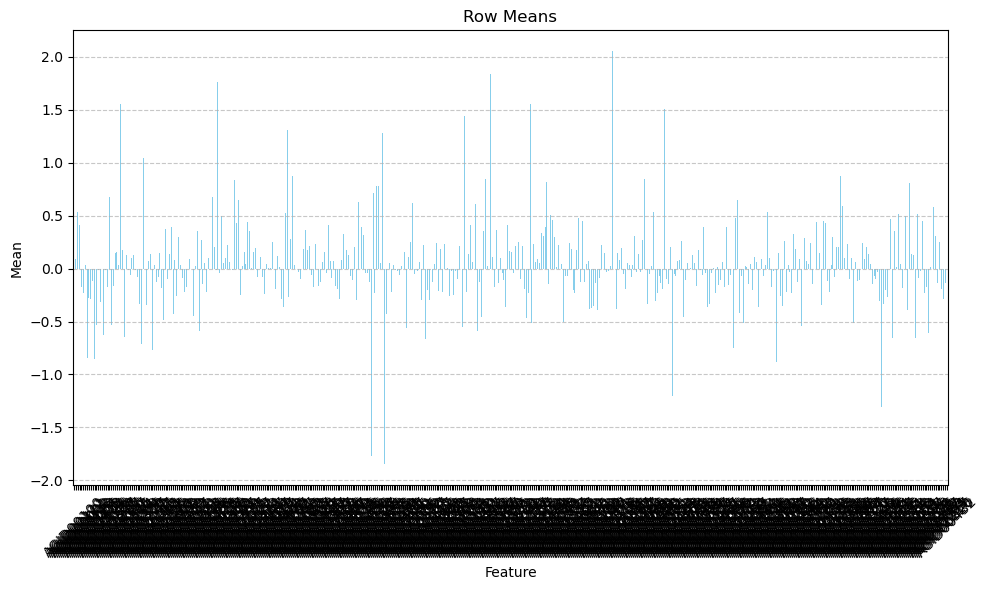

In [75]:
describe_df = X_train.describe()
row_means = describe_df.loc['mean']

# Plot row means
plt.figure(figsize=(10, 6))
row_means.plot(kind='bar', color='skyblue')
plt.title('Row Means')
plt.xlabel('Feature')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [76]:
# Number of features in your dataset
n_features = len(X_train.columns) 


input_layer = Input(shape=(n_features,))
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dense(32, activation='relu')(encoder)


bottleneck = Dense(2, activation='relu')(encoder)  

# Define the decoder (mirror the encoder)
decoder = Dense(32, activation='relu')(bottleneck)
decoder = Dense(64, activation='relu')(decoder)
encoder_model_2d= Model(inputs=input_layer, outputs=bottleneck)

# Output layer
output_layer = Dense(n_features, activation='sigmoid')(decoder) 

# Define the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [77]:
history_2d = autoencoder.fit(X_train, X_train,  # The target is the input data itself
                epochs=100,
                batch_size=16,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/100
16/16 [==============================] - 2s 80ms/step - loss: 0.6392 - val_loss: 0.6395
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.5044 - val_loss: 0.3914
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3505 - val_loss: 0.3585
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3396 - val_loss: 0.3561
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3381 - val_loss: 0.3558
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3370 - val_loss: 0.3548
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3365 - val_loss: 0.3546
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3362 - val_loss: 0.3541
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3358 - val_loss: 0.3544
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3359 - val_loss: 0.3537
Epoch 11

3/3 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        40
           1       0.00      0.00      0.00        42

    accuracy                           0.49        82
   macro avg       0.24      0.50      0.33        82
weighted avg       0.24      0.49      0.32        82



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


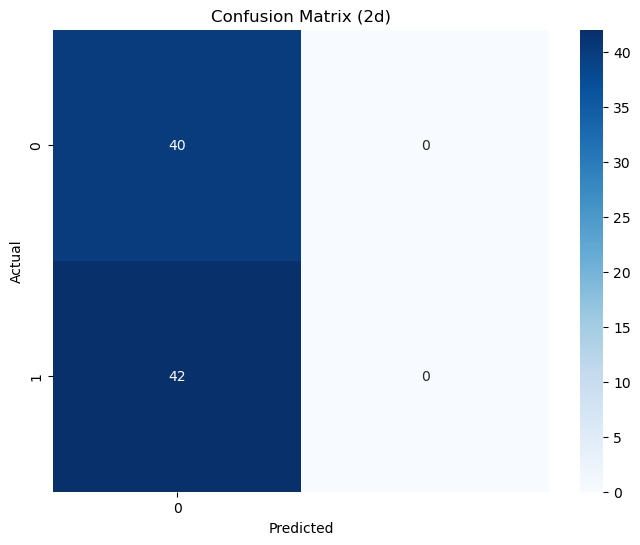

In [78]:
SVM_X_train = encoder_model_2d.predict(X_train)  
SVM_X_test = encoder_model_2d.predict(X_test)  

SVM_y_train = y_train.apply(map_to_binary)
SVM_y_test = y_test.apply(map_to_binary)
# Initialize SVM classifier
svm_classifier = SVC(kernel='poly', random_state=42)

# Train the classifier
svm_classifier.fit(SVM_X_train, SVM_y_train)

# Predict the labels of the test set
y_pred = svm_classifier.predict(SVM_X_test)

cm = confusion_matrix(SVM_y_test, y_pred)
print(classification_report(SVM_y_test, y_pred))
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_pred), yticklabels=np.unique(SVM_y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (2d)')
plt.show()


Try signature:BAK	LKB1	PAXILLIN	PEA15	SMAD4	XRCC1	CYCLINE2	PEA15_pS116	PRDX1	BRAF_pS445	IRF1
"AGID00009","AGID00529","AGID00054","AGID00124","AGID02160","AGID02137","AGID00449"，“AGID00125”，“AGID00492”，“AGID00014”，“AGID00223”
https://www.sciencedirect.com/science/article/pii/S0009898120302862

In [79]:
ps = ["AGID00009","AGID00529","AGID00054","AGID00124","AGID02160","AGID02137","AGID00449","AGID00125","AGID00492","AGID00014","AGID00223"]
key_protein = merged_df[ps]
os = merged_df["days_to_death"]
os = os.map(map_years_to_group).map(map_to_binary)

other = merged_df.columns.drop("days_to_death")
X_train, X_test, y_train, y_test = train_test_split(key_protein, os,
                                                    train_size=0.75,
                                                    random_state=1)

              precision    recall  f1-score   support

           0       0.53      0.53      0.53        40
           1       0.55      0.55      0.55        42

    accuracy                           0.54        82
   macro avg       0.54      0.54      0.54        82
weighted avg       0.54      0.54      0.54        82



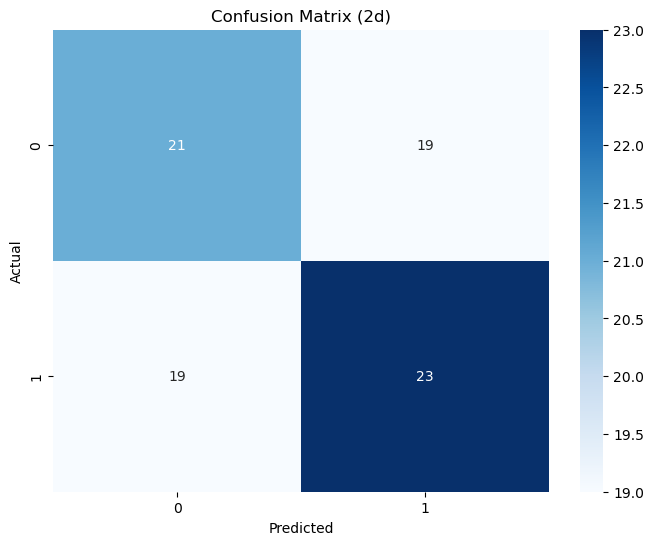

In [80]:

SVM_X_train = X_train
SVM_X_test = X_test

SVM_y_train = y_train
SVM_y_test = y_test
# Initialize SVM classifier
svm_classifier = SVC(kernel='sigmoid', random_state=42)

# Train the classifier
svm_classifier.fit(SVM_X_train, SVM_y_train)

# Predict the labels of the test set
y_pred = svm_classifier.predict(SVM_X_test)

cm = confusion_matrix(SVM_y_test, y_pred)
print(classification_report(SVM_y_test, y_pred))
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_pred), yticklabels=np.unique(SVM_y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (2d)')
plt.show()


In [81]:

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [82]:
ps = ["AGID00009","AGID00529","AGID00054","AGID00124","AGID02160","AGID02137","AGID00449","AGID00125","AGID00492","AGID00014","AGID00223"]
key_protein = merged_df[ps]
os = merged_df["days_to_death"]
os = os.map(map_years_to_group)
other = merged_df.columns.drop("days_to_death")
X_train, X_test, y_train, y_test = train_test_split(key_protein, os,
                                                    train_size=0.75,
                                                    random_state=1)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        21
         1.0       1.00      0.07      0.12        15
         2.0       0.00      0.00      0.00         0
         3.0       0.06      0.75      0.10         4
         4.0       0.00      0.00      0.00         0
         5.0       0.50      0.02      0.05        42

    accuracy                           0.06        82
   macro avg       0.26      0.14      0.05        82
weighted avg       0.44      0.06      0.05        82



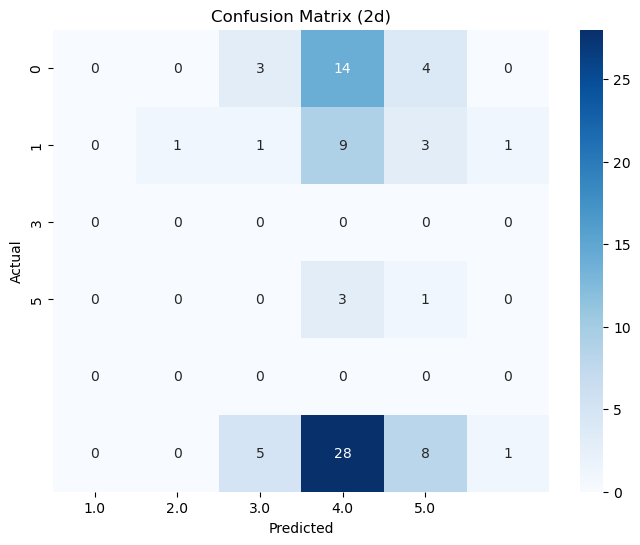

In [27]:

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_pred), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (2d)')
plt.show()


1. normalized by dividing the expression values by the sum of expression values of the analyzed genes for each sample
2. log2 transformed
3. z-scores were calculated
4. using Spearman distance and Ward criterion Cluster analyses
5. plot heatmaps using the z-score values matrix for color intensities.
6. Cox regression analyses using Kaplan–Meier curves to compare the three highest hierarchical sample groups on each heatmap
7. Cox regression multivariate was used to calculate the combined effect of HPV status and heatmap groups (Survival package in R)


https://docs.gdc.cancer.gov/Data/Bioinformatics_Pipelines/Expression_mRNA_Pipeline/
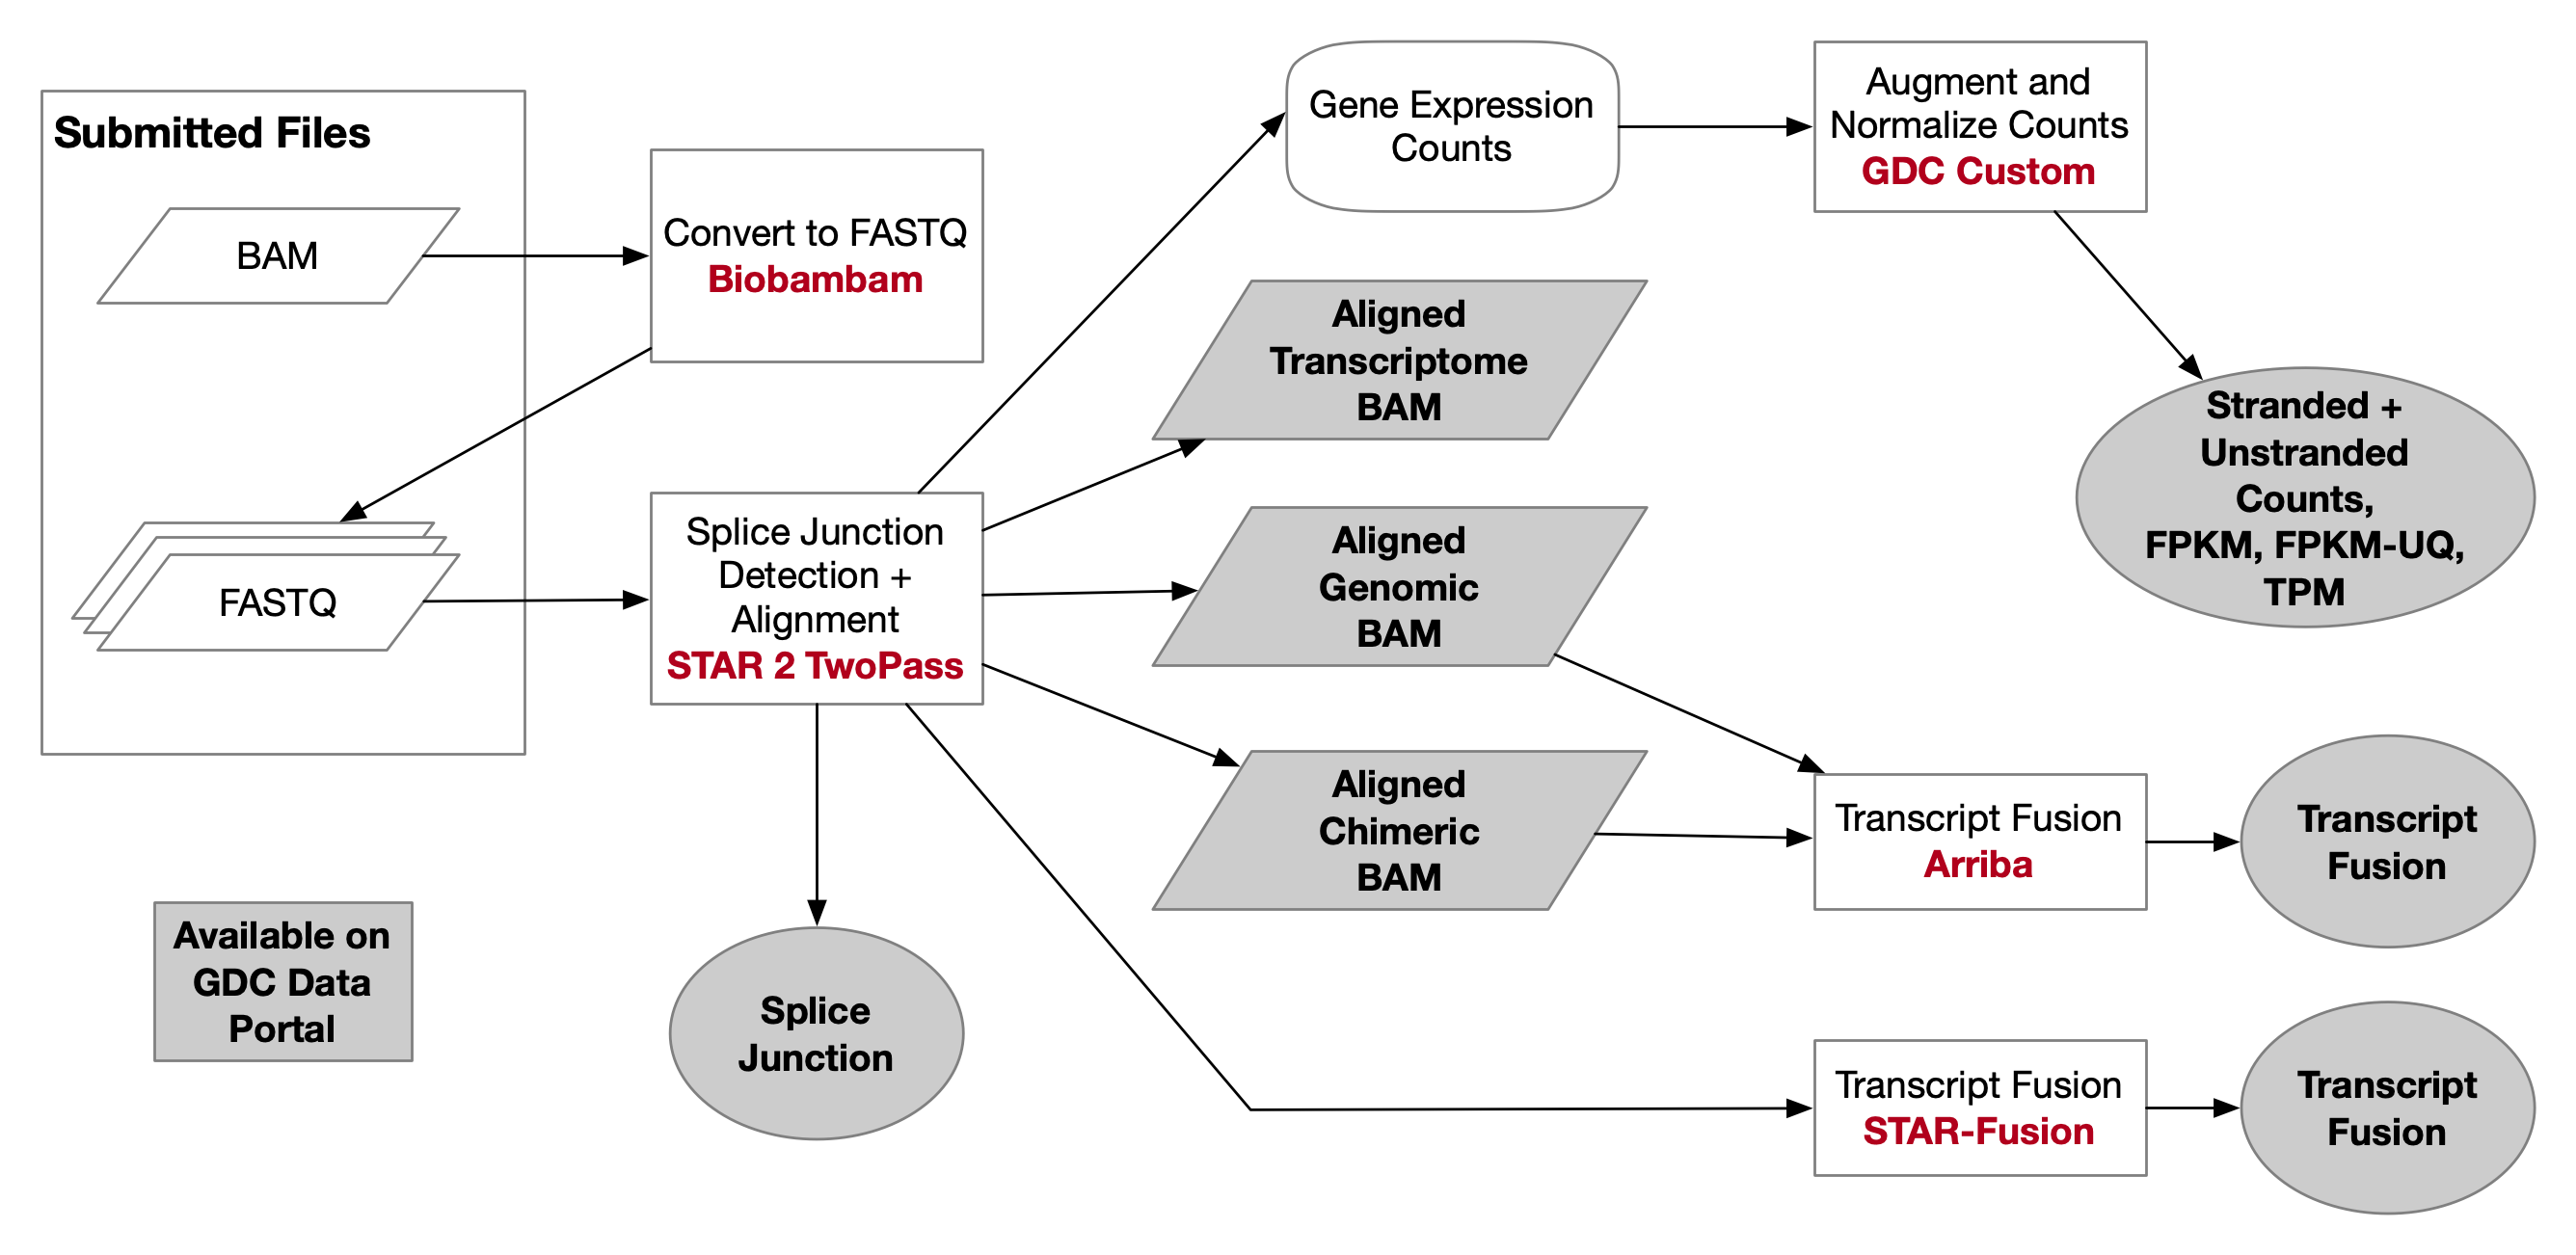
| unstranded | stranded_first |  stranded_second | tpm_unstranded | fpkm_unstranded | fpkm_uq_unstranded |

To deduce the hypoxia status, an algorithm of t-distributed Stochastic Neighbor Embedding (t-SNE) was applied [19]. t-SNE, a nonparametric, unsupervised method, can divide or condense patients into several distinct clusters, based on given signatures or hallmarks. The hallmark gene sets of hypoxia including 200 genes, were downloaded from the Molecular Signatures Database (MSigDB version 6.0). Further, expression changes of target genes involved in HIF-1 signaling pathway were analyzed between the hypoxiahigh and hypoxialow groups to explore their association with hypoxia. These targets were retrieved from the Kyoto Encyclopedia of Genes and Genomes (KEGG) database (https://www.kegg.jp/; ID:04066), including 15 genes involved in “Increase oxygen delivery” and 11 genes related to “Reduce oxygen consumption”. 
The limma algorithm was used to identify differentially expressed genes (DEGs) between the two groups [20]. Genes with a false discovery rate (FDR) adjusted p-value < 0.0001 and an absolute value of log2 (fold change) > 1 were considered as hypoxia-related DEGs.
limma algorithm
https://translational-medicine.biomedcentral.com/articles/10.1186/s12967-020-02366-0
https://academic.oup.com/bib/article/22/6/bbab173/6273240?login=true

The predefined gene sets included in our research were acquired from the Molecular Signatures Database (MSigDB; https://www.gsea-msigdb.org/gsea/msigdb/index.jsp) (44). We used the terms “lactic” and “hypoxia” as the search keywords in the MSigDB database.  After deleting duplicates, 284 LMRGs and 493 HRGs were identified for subsequent analysis [Table S2].
We analyzed differentially expressed genes (DEGs) using the R package “edgeR” in R (| log2 fold change [FC]|>1 and P < 0.05). We then identified differentially expressed LMRGs (DELMRGs) and HRGs (DEHRGs) by intersecting DEGs with LMRGs and HRGs
https://www.frontiersin.org/journals/immunology/articles/10.3389/fimmu.2022.998140/full

MSigDB
Weighted gene co-expression network analysis (WGCNA) was used to construct a scale-free co-expression network using the R package 'WGCNA' and to identify a gene module which is mostly correlated with hypoxia [38]. 
https://www.thno.org/v11p5061.htm